In [1]:
import sys
import pandas as pd
import numpy as np
sys.path.append('../..')
from src import load_image, ImageQuant2
%matplotlib widget

In [2]:
# Import quantification model
membg = np.loadtxt('../../data/calibration_mem6.txt')
cytbg = np.loadtxt('../../data/calibration_cyt.txt')
calibration_factor = np.loadtxt('../../data/calibration_constants.txt')[6]

In [3]:
# Import embryos dataframe
df = pd.read_csv('../../data/ph_embryos.csv')
df

,Unnamed: 0,Path,EmbryoID,Line,Date,RNAi
0,0,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1556901861,n2,190503,wt
1,1,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1556901937,n2,190503,wt
2,2,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1556902036,n2,190503,wt
3,3,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1556902453,n2,190503,wt
4,4,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1556902969,n2,190503,wt
5,5,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1559137737,n2,190529,wt
6,6,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1559137889,n2,190529,wt
7,7,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1565356359,od58,190809,1908081630xfp
8,8,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1565356740,od58,190809,1908081630xfp
9,9,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1565356899,od58,190809,1908081630xfp


### Quantify


  0%|                                                                                                                                       | 0/600 [00:00<?, ?it/s]


  0%|▏                                                                                                                              | 1/600 [00:00<06:15,  1.60it/s]


  2%|█▉                                                                                                                             | 9/600 [00:00<00:37, 15.95it/s]


  3%|███▎                                                                                                                          | 16/600 [00:00<00:21, 26.76it/s]


  4%|█████                                                                                                                         | 24/600 [00:00<00:15, 37.96it/s]


  6%|██████▉                                                                                                                       | 33/600 [00:01<00:11, 49.83it/s]


  7%|████████▌                                                                                                                     | 41/600 [00:01<00:09, 56.20it/s]


  8%|██████████▎                                                                                                                   | 49/600 [00:01<00:09, 58.17it/s]


  9%|███████████▊                                                                                                                  | 56/600 [00:01<00:09, 59.34it/s]


 10%|█████████████▏                                                                                                                | 63/600 [00:01<00:09, 59.35it/s]


 12%|██████████████▋                                                                                                               | 70/600 [00:01<00:08, 62.11it/s]


 13%|████████████████▏                                                                                                             | 77/600 [00:01<00:08, 62.20it/s]


 14%|█████████████████▋                                                                                                            | 84/600 [00:01<00:08, 63.60it/s]


 16%|███████████████████▌                                                                                                          | 93/600 [00:01<00:07, 68.58it/s]


 17%|████████████████████▊                                                                                                        | 100/600 [00:02<00:07, 66.70it/s]


 18%|██████████████████████▌                                                                                                      | 108/600 [00:02<00:07, 69.03it/s]


 20%|████████████████████████▍                                                                                                    | 117/600 [00:02<00:06, 72.78it/s]


 21%|██████████████████████████                                                                                                   | 125/600 [00:02<00:06, 74.58it/s]


 22%|███████████████████████████▋                                                                                                 | 133/600 [00:02<00:06, 75.34it/s]


 24%|█████████████████████████████▍                                                                                               | 141/600 [00:02<00:06, 76.28it/s]


 25%|███████████████████████████████                                                                                              | 149/600 [00:02<00:05, 76.87it/s]


 26%|████████████████████████████████▋                                                                                            | 157/600 [00:02<00:05, 74.19it/s]


 28%|██████████████████████████████████▍                                                                                          | 165/600 [00:02<00:06, 69.05it/s]


 29%|████████████████████████████████████                                                                                         | 173/600 [00:03<00:06, 67.00it/s]


 30%|█████████████████████████████████████▌                                                                                       | 180/600 [00:03<00:06, 65.55it/s]


 31%|██████████████████████████████████████▉                                                                                      | 187/600 [00:03<00:06, 65.05it/s]


 32%|████████████████████████████████████████▍                                                                                    | 194/600 [00:03<00:06, 65.64it/s]


 34%|█████████████████████████████████████████▉                                                                                   | 201/600 [00:03<00:06, 64.93it/s]


 35%|███████████████████████████████████████████▌                                                                                 | 209/600 [00:03<00:05, 67.40it/s]


 36%|█████████████████████████████████████████████▏                                                                               | 217/600 [00:03<00:05, 70.80it/s]


 38%|██████████████████████████████████████████████▉                                                                              | 225/600 [00:03<00:05, 72.72it/s]


 39%|████████████████████████████████████████████████▌                                                                            | 233/600 [00:03<00:04, 73.96it/s]


 40%|██████████████████████████████████████████████████▏                                                                          | 241/600 [00:04<00:04, 72.12it/s]


 42%|███████████████████████████████████████████████████▉                                                                         | 249/600 [00:04<00:04, 72.61it/s]


 43%|█████████████████████████████████████████████████████▉                                                                       | 259/600 [00:04<00:04, 77.81it/s]


 44%|███████████████████████████████████████████████████████▋                                                                     | 267/600 [00:04<00:04, 76.11it/s]


 46%|█████████████████████████████████████████████████████████▎                                                                   | 275/600 [00:04<00:04, 72.75it/s]


 47%|██████████████████████████████████████████████████████████▉                                                                  | 283/600 [00:04<00:04, 69.44it/s]


 48%|████████████████████████████████████████████████████████████▍                                                                | 290/600 [00:04<00:04, 67.64it/s]


 50%|█████████████████████████████████████████████████████████████▉                                                               | 297/600 [00:04<00:04, 66.62it/s]


 51%|███████████████████████████████████████████████████████████████▌                                                             | 305/600 [00:04<00:04, 68.06it/s]


 52%|█████████████████████████████████████████████████████████████████                                                            | 312/600 [00:05<00:04, 67.71it/s]


 53%|██████████████████████████████████████████████████████████████████▋                                                          | 320/600 [00:05<00:04, 68.58it/s]


 55%|████████████████████████████████████████████████████████████████████▎                                                        | 328/600 [00:05<00:03, 68.00it/s]


 56%|██████████████████████████████████████████████████████████████████████                                                       | 336/600 [00:05<00:03, 69.77it/s]


 57%|███████████████████████████████████████████████████████████████████████▋                                                     | 344/600 [00:05<00:03, 71.55it/s]


 59%|█████████████████████████████████████████████████████████████████████████▎                                                   | 352/600 [00:05<00:03, 73.07it/s]


 60%|███████████████████████████████████████████████████████████████████████████                                                  | 360/600 [00:05<00:03, 74.75it/s]


 61%|████████████████████████████████████████████████████████████████████████████▋                                                | 368/600 [00:05<00:03, 68.69it/s]


 62%|██████████████████████████████████████████████████████████████████████████████▏                                              | 375/600 [00:06<00:04, 56.03it/s]


 64%|███████████████████████████████████████████████████████████████████████████████▌                                             | 382/600 [00:06<00:03, 55.04it/s]


 65%|█████████████████████████████████████████████████████████████████████████████████▎                                           | 390/600 [00:06<00:03, 60.11it/s]


 66%|██████████████████████████████████████████████████████████████████████████████████▋                                          | 397/600 [00:06<00:03, 55.95it/s]


 67%|████████████████████████████████████████████████████████████████████████████████████▏                                        | 404/600 [00:06<00:03, 57.44it/s]


 68%|█████████████████████████████████████████████████████████████████████████████████████▍                                       | 410/600 [00:06<00:03, 48.48it/s]


 69%|██████████████████████████████████████████████████████████████████████████████████████▋                                      | 416/600 [00:06<00:03, 46.76it/s]


 70%|███████████████████████████████████████████████████████████████████████████████████████▉                                     | 422/600 [00:06<00:03, 48.93it/s]


 71%|█████████████████████████████████████████████████████████████████████████████████████████▏                                   | 428/600 [00:07<00:03, 50.04it/s]


 72%|██████████████████████████████████████████████████████████████████████████████████████████▍                                  | 434/600 [00:07<00:03, 51.41it/s]


 74%|███████████████████████████████████████████████████████████████████████████████████████████▉                                 | 441/600 [00:07<00:02, 54.59it/s]


 74%|█████████████████████████████████████████████████████████████████████████████████████████████▏                               | 447/600 [00:07<00:02, 51.06it/s]


 76%|██████████████████████████████████████████████████████████████████████████████████████████████▍                              | 453/600 [00:07<00:02, 53.12it/s]


 76%|███████████████████████████████████████████████████████████████████████████████████████████████▋                             | 459/600 [00:07<00:03, 44.90it/s]


 77%|████████████████████████████████████████████████████████████████████████████████████████████████▋                            | 464/600 [00:07<00:03, 44.30it/s]


 78%|██████████████████████████████████████████████████████████████████████████████████████████████████▏                          | 471/600 [00:07<00:02, 49.77it/s]


 80%|███████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 479/600 [00:08<00:02, 55.53it/s]


 81%|█████████████████████████████████████████████████████████████████████████████████████████████████████▍                       | 487/600 [00:08<00:01, 60.97it/s]


 82%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏                     | 495/600 [00:08<00:01, 65.80it/s]


 84%|████████████████████████████████████████████████████████████████████████████████████████████████████████▌                    | 502/600 [00:08<00:01, 64.13it/s]


 85%|██████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 509/600 [00:08<00:01, 64.58it/s]


 86%|███████████████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 517/600 [00:08<00:01, 66.11it/s]


 87%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏               | 524/600 [00:08<00:01, 61.58it/s]


 88%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋              | 531/600 [00:08<00:01, 62.14it/s]


 90%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████             | 538/600 [00:08<00:00, 62.86it/s]


 91%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊           | 546/600 [00:09<00:00, 66.63it/s]


 92%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍         | 554/600 [00:09<00:00, 69.77it/s]


 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████        | 562/600 [00:09<00:00, 60.99it/s]


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊      | 570/600 [00:09<00:00, 64.62it/s]


 96%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 579/600 [00:09<00:00, 69.08it/s]


 98%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎  | 587/600 [00:09<00:00, 70.15it/s]


 99%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 595/600 [00:09<00:00, 70.35it/s]


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 600/600 [00:09<00:00, 60.98it/s]

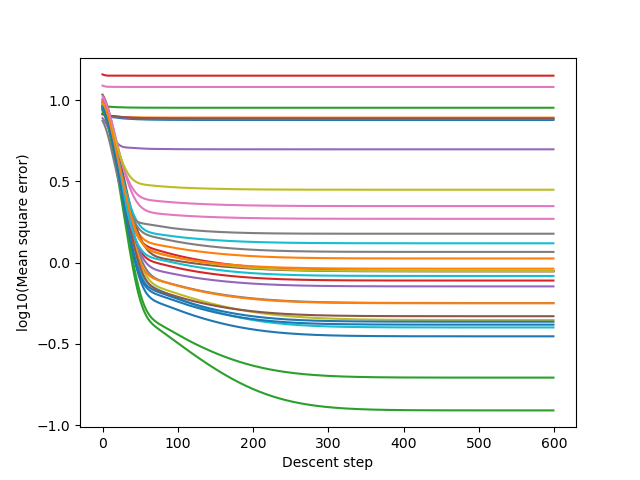

In [4]:
# Import data
paths = df.Path.to_list()
imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

# Run quantification
iq = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg)
iq.quantify()

# Plot loss curve
iq.plot_losses(log=True)

# Save results
res = iq.compile_res(ids=df['EmbryoID'].to_list())
res['Membrane signal'] *= calibration_factor
res.to_csv('../../data/ph_quantification.csv')